In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [146]:
csvdata = pd.read_csv('medical_device_adverse_events.csv')
X=csvdata.drop(columns=['Adverse_Event'])
y=csvdata['Adverse_Event']

# 标准化 划分
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=498264845)


from collections import Counter
print("训练集类别分布:", Counter(y_train))
print("测试集类别分布:", Counter(y_test))
# 使用 SMOTE 进行过采样
#smote = SMOTE(random_state=42222)
#X_train, y_train = smote.fit_resample(X_train, y_train)
#print("重新采样后的训练集类别分布:", Counter(y_train))


训练集类别分布: Counter({0: 81, 1: 39})
测试集类别分布: Counter({0: 20, 1: 10})


当k=4
模型评估:
准确率: 0.8333333333333334
召回率: 0.8333333333333334
F1分数: 0.830979888746256

分类报告:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.82      0.80      0.81        30
weighted avg       0.83      0.83      0.83        30


混淆矩阵:
[[18  2]
 [ 3  7]]


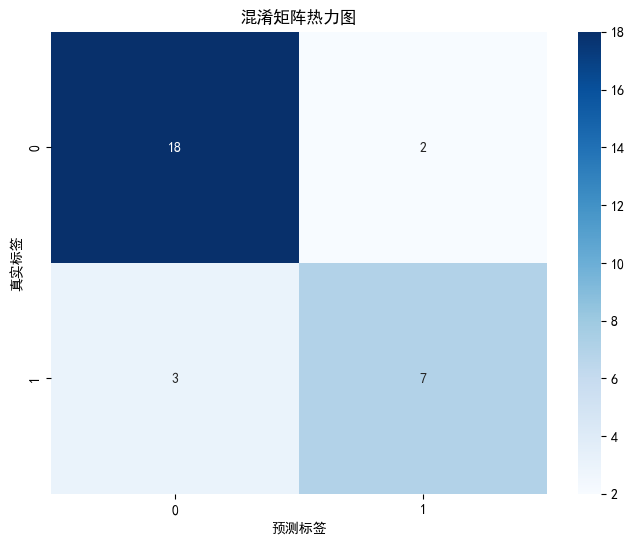

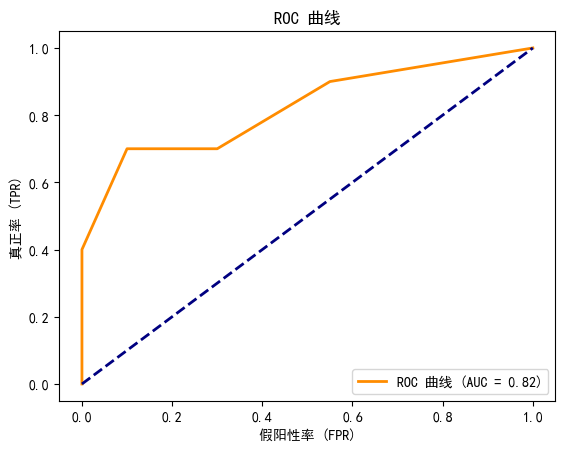

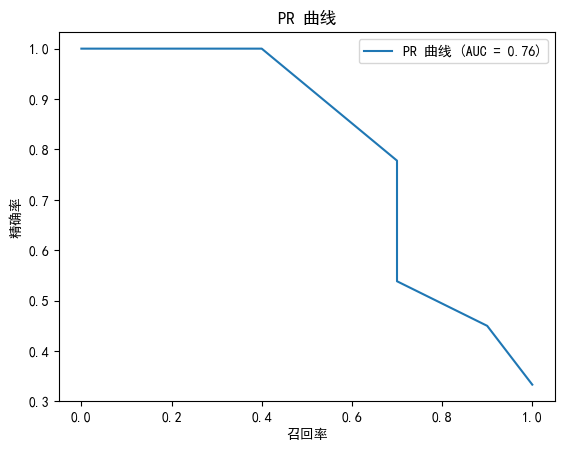

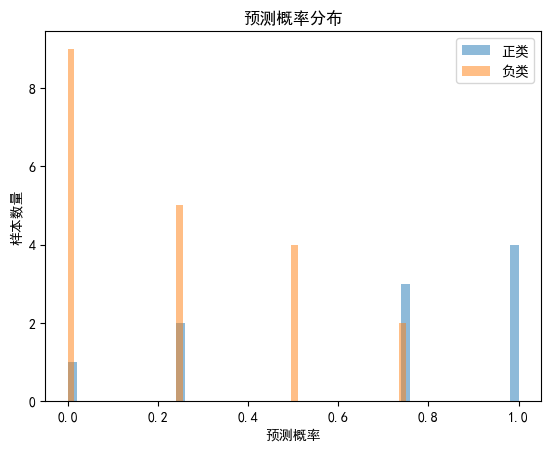

In [147]:
k=4
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

# 预测
y_pred = knn.predict(X_test)

# 评估
print(f"当k={k}\n模型评估:")
print("准确率:", accuracy_score(y_test, y_pred))
print("召回率:", recall_score(y_test, y_pred, average='weighted'))
print("F1分数:", f1_score(y_test, y_pred, average='weighted'))
print("\n分类报告:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\n混淆矩阵:")
print(conf_matrix)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('混淆矩阵热力图')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()

# 绘制 ROC 曲线
y_prob = knn.predict_proba(X_test)[:, 1]  # 获取正类的概率
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC 曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('假阳性率 (FPR)')
plt.ylabel('真正率 (TPR)')
plt.title('ROC 曲线')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'PR 曲线 (AUC = {pr_auc:.2f})')
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.title('PR 曲线')
plt.legend()
plt.show()

plt.hist(y_prob[y_test == 1], bins=50, alpha=0.5, label='正类')
plt.hist(y_prob[y_test == 0], bins=50, alpha=0.5, label='负类')
plt.xlabel('预测概率')
plt.ylabel('样本数量')
plt.legend()
plt.title('预测概率分布')
plt.show()

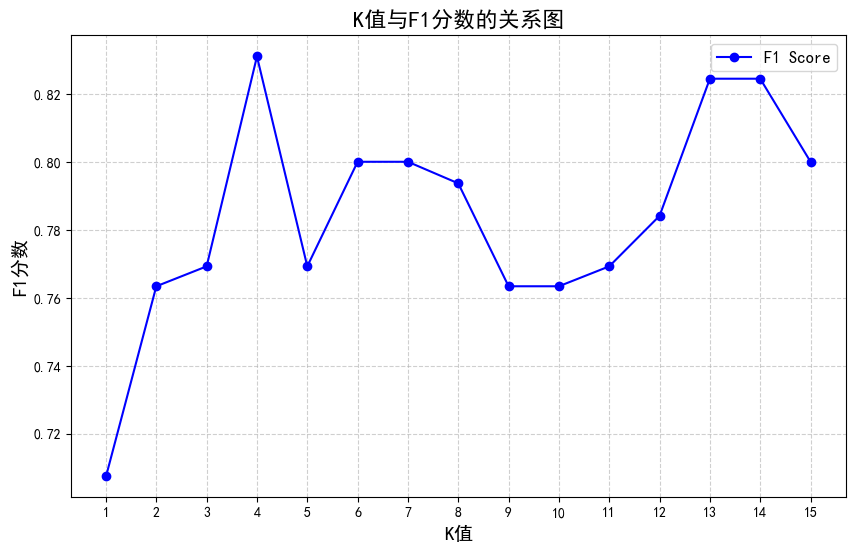

In [148]:
# 计算不同k值的F1分数
k_values = range(1, 16)  # 定义k值的范围
f1_scores = []  # 用于存储每个k值对应的F1分数

# 遍历每个k值
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # 创建KNN模型
    knn.fit(X_train, y_train)  # 在训练集上训练模型
    y_pred = knn.predict(X_test)  # 在测试集上进行预测
    f1 = f1_score(y_test, y_pred, average='weighted')  # 计算F1分数
    f1_scores.append(f1)  # 将F1分数添加到列表中
# 绘制k值与F1分数的关系图
plt.figure(figsize=(10, 6))  # 设置图表大小
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='b', label='F1 Score')  # 绘制折线图
plt.title('K值与F1分数的关系图', fontsize=16)  # 设置图表标题
plt.xlabel('K值', fontsize=14)  # 设置x轴标签
plt.ylabel('F1分数', fontsize=14)  # 设置y轴标签
plt.xticks(k_values)  # 设置x轴刻度
plt.grid(True, linestyle='--', alpha=0.6)  # 添加网格线
plt.legend(fontsize=12)  # 添加图例
plt.show()  # 显示图表